In [1]:
import glob
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
from keras.utils import  np_utils
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Model
from keras.callbacks import LambdaCallback # just to retrive weight at each epoch

Using TensorFlow backend.


In [4]:
x_train_digit=np.load('/media/nbm/New Volume/Msc_courses/ML_Sample_codes/numpy_digit_dataset_model/x_train_digit.npy')
y_train_label=np.load('/media/nbm/New Volume/Msc_courses/ML_Sample_codes/numpy_digit_dataset_model/y_train_digit.npy')


In [5]:
x_train_digit.shape


(400, 28, 28)

In [7]:
x_train_reshape=x_train_digit.reshape(x_train_digit.shape[0],x_train_digit.shape[1],x_train_digit.shape[2],1)


In [8]:
x_train_reshape.shape

(400, 28, 28, 1)

In [9]:
digit=[0,1, 2, 3, 4, 5, 6, 7, 8, 9]
char=['፩', '፪', '፫', '፬', '፭', '፮', '፯', '፰', '፱', '፲']

In [10]:
mapping=dict(zip(char,digit))

In [11]:
mapping

{'፩': 0,
 '፪': 1,
 '፫': 2,
 '፬': 3,
 '፭': 4,
 '፮': 5,
 '፯': 6,
 '፰': 7,
 '፱': 8,
 '፲': 9}

In [12]:
label=[]
for i in y_train_label:
    if i==" " or i=='' or i=='\n':continue
    label.append(mapping[i])

In [13]:
label_array=np.array(label)

In [14]:
y_train_label_new=label_array

In [15]:
y_train_label_new

array([5, 6, 4, 5, 5, 2, 0, 2, 2, 8, 0, 3, 4, 7, 7, 3, 8, 1, 7, 5, 4, 2,
       9, 7, 6, 5, 7, 8, 6, 6, 0, 0, 5, 9, 9, 6, 0, 5, 9, 3, 1, 7, 3, 8,
       9, 6, 1, 2, 0, 8, 5, 9, 8, 9, 2, 9, 2, 5, 0, 9, 2, 2, 4, 0, 4, 6,
       0, 9, 5, 8, 4, 4, 2, 9, 2, 5, 3, 4, 8, 0, 9, 8, 2, 6, 8, 7, 0, 1,
       0, 2, 4, 1, 6, 2, 3, 7, 8, 9, 2, 5, 5, 5, 2, 3, 2, 3, 2, 3, 8, 6,
       9, 2, 6, 2, 4, 5, 7, 6, 8, 3, 2, 2, 3, 2, 5, 6, 7, 1, 6, 7, 7, 7,
       3, 2, 3, 6, 6, 0, 7, 1, 4, 8, 7, 0, 2, 0, 6, 0, 2, 2, 0, 2, 3, 4,
       7, 8, 9, 6, 7, 1, 9, 5, 6, 3, 9, 4, 6, 9, 7, 8, 7, 2, 2, 4, 8, 3,
       1, 7, 4, 2, 4, 7, 4, 0, 1, 1, 7, 8, 3, 7, 1, 0, 5, 3, 5, 8, 3, 1,
       8, 8, 6, 6, 9, 4, 7, 9, 0, 6, 7, 0, 7, 5, 4, 9, 4, 9, 9, 2, 6, 0,
       4, 9, 7, 8, 3, 6, 6, 7, 1, 4, 1, 7, 8, 0, 9, 0, 0, 5, 7, 1, 1, 6,
       8, 8, 4, 9, 8, 6, 7, 1, 2, 3, 6, 6, 3, 5, 2, 1, 0, 6, 5, 0, 4, 5,
       3, 8, 5, 4, 3, 5, 4, 5, 2, 8, 2, 7, 9, 6, 0, 2, 0, 5, 0, 6, 7, 5,
       6, 7, 0, 8, 6, 4, 7, 8, 6, 5, 0, 4, 6, 7, 8,

In [13]:
y_train_label

array(['፮', '፯', '፭', '፮', '፮', '፫', '፩', '፫', '፫', '፱', '፩', '፬', '፭',
       '፰', '፰', '፬', '፱', '፪', '፰', '፮', '፭', '፫', '፲', '፰', '፯', '፮',
       '፰', '፱', '፯', '፯', '፩', '፩', '፮', '፲', '፲', '፯', '፩', '፮', '፲',
       '፬', '፪', '፰', '፬', '፱', '፲', '፯', '፪', '፫', '፩', '፱', '፮', '፲',
       '፱', '፲', '፫', '፲', '፫', '፮', '፩', '፲', '፫', '፫', '፭', '፩', '፭',
       '፯', '፩', '፲', '፮', '፱', '፭', '፭', '፫', '፲', '፫', '፮', '፬', '፭',
       '፱', '፩', '፲', '፱', '፫', '፯', '፱', '፰', '፩', '፪', '፩', '፫', '፭',
       '፪', '፯', '፫', '፬', '፰', '፱', '፲', '፫', '፮', '፮', '፮', '፫', '፬',
       '፫', '፬', '፫', '፬', '፱', '፯', '፲', '፫', '፯', '፫', '፭', '፮', '፰',
       '፯', '፱', '፬', '፫', '፫', '፬', '፫', '፮', '፯', '፰', '፪', '፯', '፰',
       '፰', '፰', '፬', '፫', '፬', '፯', '፯', '፩', '፰', '፪', '፭', '፱', '፰',
       '፩', '፫', '፩', '፯', '፩', '፫', '፫', '፩', '፫', '፬', '፭', '፰', '፱',
       '፲', '፯', '፰', '፪', '፲', '፮', '፯', '፬', '፲', '፭', '፯', '፲', '፰',
       '፱', '፰', '፫', '፫', '፭', '፱', '፬', '፪', '፰', '፭', '፫', '፭

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_train_reshape, y_train_label_new, test_size=0.1)

9

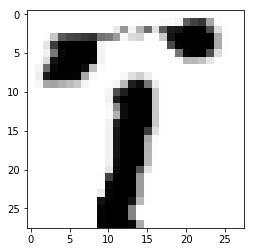

In [17]:
x_train_im=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
plt.imshow(x_train_im[132],cmap='Greys_r')# todisply the backgrouund to be white
y_train[132]#to display label

In [18]:
input_shape = (28, 28,1)
#convert our data type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize our data values to the range [0, 1].
x_train /= 255
x_test /= 255
# Convert 1-dimensional class arrays to number of class-dimensional class matrices(one hot encoding
y_trainc =np_utils.to_categorical(y_train, 10)
y_testc = np_utils.to_categorical(y_test, 10)

In [19]:
y_trainc[40]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_testc.shape

(40, 10)

In [20]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

act='relu'

input_data=Input(shape=input_shape, dtype='float32')# tensor

inner=Conv2D(nb_filters, nb_conv,padding="same",
                         activation=act, kernel_initializer='he_normal', name='conv1')(input_data)
inner =MaxPooling2D(pool_size=(nb_pool, nb_pool))(inner)
inner=Conv2D(nb_filters, nb_conv,padding="same",
                         activation=act, kernel_initializer='he_normal', name='conv5')(inner)
inner =Flatten()(inner)
inner =Dense(128)(inner)
#inner =Dropout(rate=0.2)(inner)
inner =Activation('relu')(inner)
out=Dense(10 ,activation="softmax")(inner)#number of class 10

model=Model(input_data, out)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv5 (Conv2D)               (None, 14, 14, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0   

In [ ]:
#no of param =320 in conv1 which is computed as (f*f*1)+1)*32 
#where f=3 anf the first 1 is feature in the input layer and +1 is bias and 32 is the featurs in the current layer
#second conv (3*3*32+1)*32=9248
# the fully connected number of (nurons at the previous layer+1)* neurons at the curnet layer (6272+1)*128=802944

In [22]:
# intial weight before training
#g=inner.get_weights()[1]
weight=model.get_weights()
w1=model.layers[1].get_weights()[0]# weights at the first layer
w1_bias=model.layers[1].get_weights()[1]# bias at the first layer
w1

array([[[[-0.19209248, -0.6947725 , -0.11712465,  0.71047807,
          -0.9263015 ,  0.5066868 , -0.15618916, -0.17342038,
          -0.23609738,  0.01761487, -0.37242323, -0.4236309 ,
           0.35201097, -0.00605243,  1.0398774 , -0.05744956,
           0.36596614,  0.02942347,  0.27212042,  0.00564442,
          -0.0378271 ,  0.02994603, -0.1693004 ,  0.13575846,
           0.11369019, -0.9442923 , -0.36674547, -0.84852314,
          -0.54037535,  0.12295395,  0.00152154,  0.5168917 ]],

        [[-0.45292306, -0.02449091,  0.1689715 , -0.02657461,
           0.4729123 , -0.8501865 , -0.35413155, -0.9002914 ,
           0.0182078 ,  0.03595655,  0.42744136, -0.46386793,
          -0.02682835, -0.3165    , -0.33882937, -0.94518274,
           0.4052237 ,  0.5607496 ,  1.0188392 ,  0.8110558 ,
           0.39942044,  0.3364692 , -0.31735817,  0.10576472,
           0.13607144, -0.31199068, -0.28735477,  0.0955568 ,
          -0.02123489, -0.3481069 ,  0.33413473,  0.35361353]],

  

In [19]:
w1_bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [34]:
model.layers[1]

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# without accessing weights at the end of every epoch
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])
hist = model.fit(x_train, y_trainc, batch_size=16, epochs=15,verbose=1,
                       validation_split=0.1, callbacks=[early_stopping])#verbose is progeres bar

Train on 324 samples, validate on 36 samples
Epoch 1/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.5927 - val_accuracy: 0.7778
Epoch 2/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6997 - val_accuracy: 0.7778
Epoch 3/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7282 - val_accuracy: 0.7778
Epoch 4/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7857 - val_accuracy: 0.7778
Epoch 5/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8072 - val_accuracy: 0.7778
Epoch 6/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8462 - val_accuracy: 0.7778
Epoch 7/15
324/324 [==============================] - 1s 2ms/step - loss: 9.3297e-04 - accuracy: 1.0000

In [22]:
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[1].get_weights()))

In [25]:
#accessing weights at the end of every epoch
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])
hist = model.fit(x_train, y_trainc, batch_size=16, epochs=15,verbose=1,
                       validation_split=0.1, callbacks=[early_stopping,print_weights])#verbose is progeres bar

Train on 324 samples, validate on 36 samples
Epoch 1/15
324/324 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9938 - val_loss: 0.6357 - val_accuracy: 0.9167
[array([[[[ 0.3259688 ,  0.9648304 ,  0.7676237 ,  0.45475107,
           0.6400549 , -0.61909986, -0.24267562,  0.9099711 ,
           0.1792458 ,  0.20115782, -0.73037565,  0.15250975,
          -0.15851617, -0.9281785 ,  0.6957822 , -0.04391561,
          -0.67872554, -0.3695212 ,  0.14376898,  0.1024562 ,
          -0.14639896, -0.7267274 , -0.65617204,  0.2577765 ,
           0.07621664,  0.12150358, -0.12510668,  0.25529802,
           0.57255965,  0.22846824,  0.10036107,  0.35759836]],

        [[-0.2893077 , -0.6957658 ,  0.2628161 ,  0.12580606,
           0.3303735 ,  0.4620167 , -0.40035048,  0.45880792,
          -0.10007878, -0.29151878, -0.54545844,  0.453179  ,
           0.8897891 ,  0.49173176,  0.20003049, -0.15160708,
          -0.18485847,  0.24247023,  0.20690463, -0.56789875,
   

324/324 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9969 - val_loss: 0.6737 - val_accuracy: 0.9167
[array([[[[ 0.32618228,  0.9647427 ,  0.7694999 ,  0.45527622,
           0.6402714 , -0.61782163, -0.2426273 ,  0.9099244 ,
           0.18602483,  0.20350797, -0.7288854 ,  0.15248694,
          -0.15830815, -0.9280325 ,  0.6984018 , -0.04322376,
          -0.67756623, -0.36919636,  0.14382486,  0.10206943,
          -0.14597085, -0.7291834 , -0.6546398 ,  0.25782603,
           0.07606115,  0.12339029, -0.12545952,  0.25475097,
           0.57296515,  0.22827177,  0.10049513,  0.35766304]],

        [[-0.28925893, -0.69583696,  0.26453033,  0.1261418 ,
           0.33039552,  0.46328652, -0.40025997,  0.45878676,
          -0.07964227, -0.28975874, -0.5434903 ,  0.45281798,
           0.8899479 ,  0.4919277 ,  0.20241995, -0.15107507,
          -0.18308392,  0.24285747,  0.20690927, -0.5681557 ,
          -0.18244219, -0.39039335,  0.41691282,  0.8479337

324/324 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9969 - val_loss: 0.6412 - val_accuracy: 0.9167
[array([[[[ 0.32635927,  0.9647509 ,  0.7711866 ,  0.45602533,
           0.6411903 , -0.6168233 , -0.2425803 ,  0.90998495,
           0.19191979,  0.20533372, -0.7274314 ,  0.15247433,
          -0.15821458, -0.92794377,  0.7006178 , -0.04258716,
          -0.676505  , -0.36900815,  0.14388062,  0.10165038,
          -0.14565827, -0.7323439 , -0.6532823 ,  0.257907  ,
           0.07598801,  0.1250265 , -0.12545785,  0.2544433 ,
           0.5732775 ,  0.2280876 ,  0.10056754,  0.3577864 ]],

        [[-0.28923616, -0.6958246 ,  0.26609665,  0.12681384,
           0.33125347,  0.4642423 , -0.40017936,  0.45891073,
          -0.06023376, -0.28845906, -0.5419079 ,  0.45252988,
           0.8899893 ,  0.4920617 ,  0.204491  , -0.15058428,
          -0.18144645,  0.24312572,  0.20692685, -0.5684596 ,
          -0.18215473, -0.39121208,  0.41839287,  0.8480546

324/324 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9969 - val_loss: 0.7238 - val_accuracy: 0.9167
[array([[[[ 0.3265221 ,  0.9647664 ,  0.7725195 ,  0.45663804,
           0.6419245 , -0.6158668 , -0.24253012,  0.9100317 ,
           0.19813786,  0.20720115, -0.7262319 ,  0.15249506,
          -0.15820912, -0.927821  ,  0.70262283, -0.04213116,
          -0.67567784, -0.36882788,  0.14395419,  0.10142777,
          -0.14534584, -0.73437047, -0.6521156 ,  0.25798258,
           0.07593333,  0.12624703, -0.12552775,  0.2542398 ,
           0.5735282 ,  0.22798613,  0.10064932,  0.3579783 ]],

        [[-0.28919992, -0.6958017 ,  0.26735535,  0.12728387,
           0.33188552,  0.46522558, -0.40007073,  0.45902246,
          -0.04197548, -0.28716773, -0.5404413 ,  0.45230526,
           0.88996476,  0.49222875,  0.2063295 , -0.15019313,
          -0.1801365 ,  0.24334522,  0.20696981, -0.5685967 ,
          -0.18184419, -0.39171496,  0.4197833 ,  0.8481752

324/324 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9969 - val_loss: 0.7126 - val_accuracy: 0.9167
[array([[[[ 0.32665926,  0.96474683,  0.77357894,  0.45707208,
           0.64243984, -0.6152264 , -0.2424952 ,  0.910114  ,
           0.204838  ,  0.20877194, -0.72527885,  0.15249299,
          -0.15806134, -0.92772883,  0.7041742 , -0.04153815,
          -0.6748247 , -0.36857998,  0.14399597,  0.10121192,
          -0.14511046, -0.73564315, -0.65116274,  0.25801444,
           0.07583704,  0.1273292 , -0.12562487,  0.25395724,
           0.57375133,  0.22790053,  0.10074206,  0.35801974]],

        [[-0.28916398, -0.6958202 ,  0.26834473,  0.12761459,
           0.3323174 ,  0.46588263, -0.39999288,  0.45914462,
          -0.0197898 , -0.28597394, -0.53924763,  0.4520978 ,
           0.89009124,  0.49235085,  0.20776623, -0.14981812,
          -0.17891596,  0.24363516,  0.20697902, -0.5687503 ,
          -0.18160914, -0.39199024,  0.420856  ,  0.8482408

324/324 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9938 - val_loss: 0.7247 - val_accuracy: 0.9167
[array([[[[ 0.32674852,  0.9647542 ,  0.77454406,  0.4572586 ,
           0.64277834, -0.61468047, -0.24248138,  0.9101645 ,
           0.20932665,  0.20999214, -0.7244911 ,  0.15248549,
          -0.15802127, -0.9276611 ,  0.70531017, -0.0409903 ,
          -0.6741741 , -0.3684462 ,  0.14403664,  0.10102186,
          -0.14491874, -0.7364037 , -0.6502409 ,  0.25805417,
           0.07580642,  0.12819648, -0.12566696,  0.2537913 ,
           0.5739419 ,  0.22781962,  0.1008089 ,  0.3581007 ]],

        [[-0.2891544 , -0.69580954,  0.26928917,  0.12772843,
           0.33260658,  0.466437  , -0.39995277,  0.45923224,
          -0.00718914, -0.28501976, -0.5382416 ,  0.4519374 ,
           0.890107  ,  0.49243543,  0.20883384, -0.14942369,
          -0.1778518 ,  0.24380414,  0.20699646, -0.568886  ,
          -0.18141742, -0.3920606 ,  0.4218531 ,  0.8483103

In [23]:
# intial weight after training
#g=inner.get_weights()[1]
weight_trained=model.get_weights()
w1_train=model.layers[1].get_weights()[0]# weights at the first layer
w1_bias_train=model.layers[5].get_weights()[1]# bias at the first layer
w1_bias_train

array([-1.3205263e-05,  3.0222435e-03,  3.9530806e-03, -5.8019441e-03,
        1.0295335e-02,  1.4545607e-03,  2.9471151e-03, -5.4300455e-03,
       -5.8143977e-03,  2.1972379e-03, -5.3405347e-03, -5.2485536e-03,
        8.8095702e-03, -1.1055590e-02, -3.5677983e-03,  3.6953229e-03,
       -5.8119101e-03, -6.1267316e-03, -5.8073215e-03,  2.1903671e-03,
        2.5043478e-03,  3.2170785e-03, -5.8144727e-03, -5.8144210e-03,
       -5.8132187e-03,  1.3348983e-03,  3.6075695e-03, -5.8087418e-03,
        2.8946425e-03, -6.0022310e-03, -8.3673494e-03,  2.6145407e-03,
        1.2623485e-02,  7.5160121e-03, -4.3453989e-03, -8.2274051e-03,
       -5.8144028e-03, -5.5917054e-03,  8.7333901e-04, -5.3459792e-03,
        3.9581428e-03,  3.4866508e-03,  2.0277153e-03, -2.9169964e-03,
        2.8032346e-03, -5.8141802e-03, -5.8141006e-03, -5.8145970e-03,
       -5.8142273e-03, -5.8100927e-03, -5.2277674e-03,  8.6470172e-03,
       -5.8145542e-03, -5.8091427e-03, -5.3460575e-03, -4.8759975e-03,
      

In [41]:
(np.array(w1_bias_train)).shape

(128,)

In [27]:
score = model.evaluate(x_test,y_testc, verbose=1)

40/40 [==============================] - 0s 411us/step


In [28]:
score

[1.62081036567688, 0.7749999761581421]

In [29]:
x=model.predict(x_test)
clas=x.argmax(axis=-1)

In [30]:
clas

array([7, 3, 0, 5, 0, 9, 4, 5, 4, 8, 7, 2, 5, 2, 2, 6, 4, 5, 4, 9, 1, 2,
       4, 6, 8, 6, 0, 0, 7, 8, 5, 8, 7, 6, 4, 7, 7, 0, 7, 7])

In [31]:
y_test

array([7, 3, 0, 5, 0, 1, 4, 5, 4, 8, 9, 0, 5, 9, 6, 6, 4, 5, 4, 8, 1, 4,
       4, 6, 8, 6, 0, 2, 7, 8, 5, 8, 7, 7, 4, 7, 7, 0, 7, 7])